# COMP 432 - Artificial Intelligence
# Assigment 1

## Task 1 : Text Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns

from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score


### Question 1

In [2]:
classes = ['business','entertainment','politics','sport','tech']
distrib = {}

In [3]:
os.chdir('BBC')
for clas in classes:
    os.chdir(clas)
    distrib[clas] = len(os.listdir())
    os.chdir("..")
os.chdir("..")

In [4]:
distrib

{'business': 510,
 'entertainment': 386,
 'politics': 417,
 'sport': 511,
 'tech': 401}

### Question 2

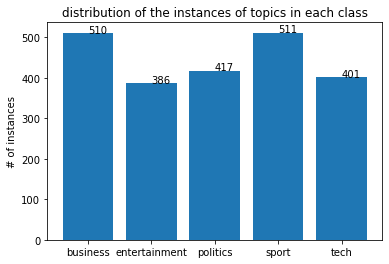

In [5]:
t = np.arange(len(distrib))
plt.bar(t,distrib.values(),align='center')
plt.xticks(t,list(distrib.keys()))
for index,data in enumerate(list(distrib.values())):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=10))
plt.title('distribution of the instances of topics in each class')
plt.ylabel('# of instances')
plt.savefig('bbc-distribution.pdf')
plt.show()

### Question 3

In [6]:
files = load_files('BBC',categories = classes,encoding="latin1")
print(files.keys())
# print(files['data']) # list containing the content of every files
# print(files['filenames']) #list containing the path of every files
# print(files['target_names']) #list of the 5 categories
# print(files['target']) # list of categories of every files (second file is tech -> files['target'][1]=4)
# print(files['DESCR']) #description of dataset
# print(files['data'][np.random.randint(0,len(files['data']))])

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


### Question 4

In [7]:
vectorizer = CountVectorizer(files, encoding='latin1') #object who will count the words
#print(vectorizer)
X = vectorizer.fit_transform(files['data']) #matrix col->file, row->word, value-># of occurence of the word j in the file #i
ft = vectorizer.get_feature_names() # get the list of all the words found in the files
print(X.shape)
print(len(ft))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(2225, 29421)
29421


In [8]:
print(X.shape) 
print(vectorizer.vocabulary_.get('or')) #get the # of occurence of a word in all the files

(2225, 29421)
18936


### Question 5

In [9]:
Y = files['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [10]:
print(X_train.shape)
print(Y_train.shape)
print(np.count_nonzero(Y_test==4))

(1780, 29421)
(1780,)
78


In [11]:
i = 0
for name in files['filenames']:
    if 'politics' in name:
        i += 1
print(i)

417


### Question 6

In [12]:
mnb_class_1 = MultinomialNB()
mnb_class_1.fit(X_train, Y_train)

MultinomialNB()

In [13]:
Y_tpred1 = mnb_class_1.predict(X_test)
score_mnb = mnb_class_1.score(X_test, Y_test)
print('accuracy multinomial Naive Bayes Classifier : {:f}%'.format(score_mnb*100))

accuracy multinomial Naive Bayes Classifier : 96.629213%


### Question 7

['business', 'entertainment', 'politics', 'sport', 'tech']


[Text(0, 0.5, 'business'),
 Text(0, 1.5, 'entertainment'),
 Text(0, 2.5, 'politics'),
 Text(0, 3.5, 'sport'),
 Text(0, 4.5, 'tech')]

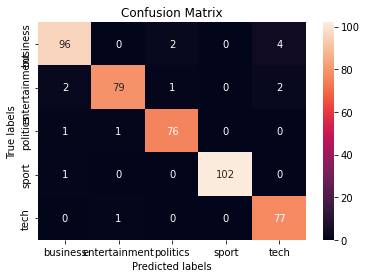

In [14]:
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels #for the plot of the confusion matrix

print(files['target_names'])
#print(Y_test)
cm_y_true = [files['target_names'][Y_test[i]] for i in range(Y_test.shape[0])]
cm_y_pred1 = [files['target_names'][Y_tpred1[i]] for i in range(Y_test.shape[0])] #list of pred with name of categories instead of number
    
cm = confusion_matrix(cm_y_true,cm_y_pred1)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(classes)
ax.yaxis.set_ticklabels(classes)


In [15]:
# report = classification_report(cm_y_true,cm_y_pred1)
# print(report)
# acc = accuracy_score(cm_y_true,cm_y_pred1)
# print(acc)

# f1_sc = f1_score(cm_y_true,cm_y_pred1, average=None)
# print(f1_sc)

In [16]:
# report = classification_report(cm_y_true, cm_y_pred1,output_dict=True)
# print(report['business']['f1-score'])

In [17]:
def save(X, y_true, y_pred, title, vectorizer,words):
    header = "\n\n\n-------------- "+title+" --------------\n"
    print(header)
    questb = '\nb) Confusion matrix\n'
    print(questb)
    Lcl = ['bus','ent','pol','spo','tec',]
    cm = confusion_matrix(y_true, y_pred)

    cm_f = "axis : x-> Predicted labels; y-> True labels\n\n"
    cm_f+= "|bus|ent|pol|spo|tec|\n"
    cm_f+= "---------------------\n"
    for i in range(cm.shape[0]):
        cm_f += "|{:<3s}|{:<3s}|{:<3s}|{:<3s}|{:<3s}|{:<3s}\n".format(str(cm[i,0]),str(cm[i,1]),str(cm[i,2]),str(cm[i,3]),str(cm[i,4]),Lcl[i])
    print(cm_f)
    questb+=cm_f
    
    questc = "\nc) Precision, recall, and F1-measure\n"
    print(questc)
    report = classification_report(y_true, y_pred,output_dict=True)
    rep = "             | precision |  recall  | f1-score |\n"
    for c in classes:
        rep+="{:<13s}|{:<11.8s}|{:<10.8s}|{:<10.8s}|\n".format(c,str(report[c]['precision']),str(report[c]['recall']),str(report[c]['f1-score']))
    print(rep)
    questc+="\n"+rep
    
    questd = "\n\nd) Accuracy, macro-average F1 and weighted-average F1 of the model\n"
    print(questd)
    acc = accuracy_score(y_true, y_pred)
    print('Accuracy                  : ',acc)
    questd += f"Accuracy                  : {acc}\n"
    
    f1_sc_mac = f1_score(y_true, y_pred, average='macro')
    print('Macro-average F1-score    : ', f1_sc_mac)
    questd += f"Macro-average F1-score    : {f1_sc_mac}\n"
    
    f1_sc_wei = f1_score(y_true, y_pred, average='weighted')
    print('Weighted-average F1-score : ',f1_sc_wei)
    questd += f"Weighted-average F1-score : {f1_sc_wei}\n"
    
    queste = "\n\ne) Prior probability\n"
    print(queste)
    prior_proba = {c:y_true.count(c)/len(y_true) for c in classes}
    pr_prob = ""
    for c in classes : 
        pr_prob += "{:<13s}:{:s}\n".format(c,str(prior_proba[c]))
    print(pr_prob)
    queste += pr_prob
    
    questf = "\nf) Size of the vocabulary\n"
    print(questf)
    size_voc = X.shape[1]
    print('Size of vocabulary : ',size_voc)
    questf += f"Size of vocabulary : {size_voc}"
    
    questg = "\n\ng) Number of word-tokens in each class\n"
    print(questg)
    dict_num_word = {c:0 for c in classes}
    for index,name in enumerate(files['filenames']):
        for c in classes:
            if c in name:
                dict_num_word[c] += np.sum(X[index,:])
    d_n_w = ''
    for c in classes : 
        d_n_w += "{:<13s}:{:s}\n".format(c,str(dict_num_word[c]))
    print(d_n_w)
    questg += d_n_w
    
    questh = "\nh) Number of word-tokens in the entire corpus\n"
    print(questh)
    nb_word = np.sum(X)
    print('Total number of word in the entire corpus : ',nb_word)
    questh += f"Total number of word in the entire corpus : {nb_word}"
    
    questi = "\n\ni) Number and percentage of words with a frequency of zero in each class\n\n"
    print(questi)
    dict_file_class = {c:np.zeros((distrib[c],X.shape[1])) for c in classes}
    dict_index = {c:0 for c in classes}
    for index,val in enumerate(files['target']):
        dict_file_class[classes[val]][dict_index[classes[val]],:] = X[index,:].toarray()
        dict_index[classes[val]] += 1
    dict_occur_zero = {c:np.count_nonzero((np.all((dict_file_class[c] == 0), axis=0))) for c in classes}
    #print(dict_occur_one)
    dict_perc_zero = {c:(dict_occur_zero[c]/dict_num_word[c])*100 for c in classes}
    #print(dict_perc_zero)
    freq = "|  bus  |  ent  |  pol  |  spo  |  tec  |\n"
    freq+= "----------------------------------------\n"
    freq+= "|{:<7s}|{:<7s}|{:<7s}|{:<7s}|{:<7s}|{}\n".format(str(dict_num_word['business']),str(dict_num_word['entertainment']),str(dict_num_word['politics']),str(dict_num_word['sport']),str(dict_num_word['tech']),'Number of word in class')
    freq+= "|{:<7s}|{:<7s}|{:<7s}|{:<7s}|{:<7s}|{}\n".format(str(dict_occur_zero['business']),str(dict_occur_zero['entertainment']),str(dict_occur_zero['politics']),str(dict_occur_zero['sport']),str(dict_occur_zero['tech']),'Number of word with a frequency of zero in each class')
    freq+= "|{:<6.6s}%|{:<6.6s}%|{:<6.6s}%|{:<6.6s}%|{:<6.6s}%|{}\n".format(str(dict_perc_zero['business']),str(dict_perc_zero['entertainment']),str(dict_perc_zero['politics']),str(dict_perc_zero['sport']),str(dict_perc_zero['tech']),'Percentage of word with a frequency of zero')
    print(freq)
    questi += freq
    
    questj = "\nj) Number and percentage of words with a frequency of one in the entire corpus\n"
    print(questj)
#     print(X.toarray() == 1) # True in the matrix represent words appearing only 1 time in a file
#     print(np.count_nonzero(X.toarray() == 1,axis=0)) #count number of True in each columns
    nb_occur_one = np.count_nonzero(np.count_nonzero(X.toarray() == 1,axis=0)==1) #return the number of column with only one True
    nb_perc_one = (nb_occur_one/X.shape[1])*100
    print('Number of word appearing one time in the entire corpus : ',nb_occur_one)
    print('Percentage of word appearing one time in the entire corpus : ',nb_perc_one)
    questj += f"Number of word appearing one time in the entire corpus : {nb_occur_one}\n"
    questj += f"Percentage of word appearing one time in the entire corpus : {nb_perc_one}"
    
    questk = "\n\nk) 2 favorite words"
    print(questk)
    dict_prob_word = {}
    for word in words:
        dict_prob_word[word] = (vectorizer.vocabulary_.get(word),vectorizer.vocabulary_.get(word)/nb_word)
    

    wor = ''
    for index,word in enumerate(words):
        wor+="word n°"+str(index+1)+" : '"+word+"'-> "+str(dict_prob_word[word][0])+" occurences (log_prob:"+str(np.log(dict_prob_word[word][1]))+str(")\n")
    print(wor)
    questk += "\n"+wor
    
    string=""
    string+=header
    string+=questb
    string+=questc
    string+=questd
    string+=queste
    string+=questf
    string+=questg
    string+=questh
    string+=questi
    string+=questj
    string+=questk
    string = string.replace("\n", "\n")
    return string

    
string = save(X,cm_y_true,cm_y_pred1,"multinomial Naive Bayes Classifier, first try",vectorizer,['artificial','intelligence'])




-------------- multinomial Naive Bayes Classifier, first try --------------


b) Confusion matrix

axis : x-> Predicted labels; y-> True labels

|bus|ent|pol|spo|tec|
---------------------
|96 |0  |2  |0  |4  |bus
|2  |79 |1  |0  |2  |ent
|1  |1  |76 |0  |0  |pol
|1  |0  |0  |102|0  |spo
|0  |1  |0  |0  |77 |tec


c) Precision, recall, and F1-measure

             | precision |  recall  | f1-score |
business     |0.96       |0.941176  |0.950495  |
entertainment|0.975308   |0.940476  |0.957575  |
politics     |0.962025   |0.974358  |0.968152  |
sport        |1.0        |0.990291  |0.995121  |
tech         |0.927710   |0.987179  |0.956521  |



d) Accuracy, macro-average F1 and weighted-average F1 of the model

Accuracy                  :  0.9662921348314607
Macro-average F1-score    :  0.9655734727345386
Weighted-average F1-score :  0.966312446922542


e) Prior probability

business     :0.2292134831460674
entertainment:0.18876404494382024
politics     :0.1752808988764045
sport      

### Question 8

In [18]:
mnb_class_2 = MultinomialNB()
mnb_class_2.fit(X_train, Y_train)

MultinomialNB()

In [19]:
Y_tpred2 = mnb_class_2.predict(X_test)
score_mnb = mnb_class_2.score(X_test, Y_test)
print('accuracy multinomial Naive Bayes Classifier, second try : {:f}%'.format(score_mnb*100))

accuracy multinomial Naive Bayes Classifier, second try : 96.629213%


In [20]:
cm_y_pred2 = [files['target_names'][Y_tpred2[i]] for i in range(Y_test.shape[0])]

### Question 9

In [21]:
mnb_class_3 = MultinomialNB(alpha = 0.0001)
mnb_class_3.fit(X_train, Y_train)

MultinomialNB(alpha=0.0001)

In [22]:
Y_tpred3 = mnb_class_3.predict(X_test)
score_mnb = mnb_class_3.score(X_test, Y_test)
print('accuracy multinomial Naive Bayes Classifier, smoothing value=0.0001 : {:f}%'.format(score_mnb*100))

accuracy multinomial Naive Bayes Classifier, smoothing value=0.0001 : 97.078652%


In [23]:
cm_y_pred3 = [files['target_names'][Y_tpred3[i]] for i in range(Y_test.shape[0])]

### Question 10

In [24]:
mnb_class_4 = MultinomialNB(alpha = 0.9)
mnb_class_4.fit(X_train, Y_train)

MultinomialNB(alpha=0.9)

In [25]:
Y_tpred4 = mnb_class_4.predict(X_test)
score_mnb = mnb_class_4.score(X_test, Y_test)
print('accuracy multinomial Naive Bayes Classifier, smoothing value=0.9 : {:f}%'.format(score_mnb*100))

accuracy multinomial Naive Bayes Classifier, smoothing value=0.9 : 96.629213%


In [26]:
cm_y_pred4 = [files['target_names'][Y_tpred4[i]] for i in range(Y_test.shape[0])]

### Save all the performances

In [27]:
s1 = save(X,cm_y_true,cm_y_pred1,"multinomial Naive Bayes Classifier, first try",vectorizer,['artificial','intelligence'])
s2 = save(X,cm_y_true,cm_y_pred2,"multinomial Naive Bayes Classifier, second try",vectorizer,['is','computer'])
s3 = save(X,cm_y_true,cm_y_pred3,"multinomial Naive Bayes Classifier, smoothing value=0.0001",vectorizer,['machine','learning'])
s4 = save(X,cm_y_true,cm_y_pred4,"multinomial Naive Bayes Classifier, smoothing value=0.9",vectorizer,['money','table'])






-------------- multinomial Naive Bayes Classifier, first try --------------


b) Confusion matrix

axis : x-> Predicted labels; y-> True labels

|bus|ent|pol|spo|tec|
---------------------
|96 |0  |2  |0  |4  |bus
|2  |79 |1  |0  |2  |ent
|1  |1  |76 |0  |0  |pol
|1  |0  |0  |102|0  |spo
|0  |1  |0  |0  |77 |tec


c) Precision, recall, and F1-measure

             | precision |  recall  | f1-score |
business     |0.96       |0.941176  |0.950495  |
entertainment|0.975308   |0.940476  |0.957575  |
politics     |0.962025   |0.974358  |0.968152  |
sport        |1.0        |0.990291  |0.995121  |
tech         |0.927710   |0.987179  |0.956521  |



d) Accuracy, macro-average F1 and weighted-average F1 of the model

Accuracy                  :  0.9662921348314607
Macro-average F1-score    :  0.9655734727345386
Weighted-average F1-score :  0.966312446922542


e) Prior probability

business     :0.2292134831460674
entertainment:0.18876404494382024
politics     :0.1752808988764045
sport      

Number of word appearing one time in the entire corpus :  10975
Percentage of word appearing one time in the entire corpus :  37.303286767954866


k) 2 favorite words
word n°1 : 'money'-> 17652 occurences (log_prob:-3.858206464017371)
word n°2 : 'table'-> 26012 occurences (log_prob:-3.4704975854177667)



In [28]:
f = open("bbc-performance.txt", "w")
f.write(s1)
f.write(s2)
f.write(s3)
f.write(s4)
f.close()